In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#reading the dataset
df=pd.read_excel("Healthcare_dataset.xlsx", sheet_name='Dataset')

In [3]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [4]:
df.shape

(3424, 69)

In [5]:
#information on the numerical columns
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
df.skew(axis = 0, skipna = True)

Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

In [7]:

# checking for missing variables
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [8]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [9]:
#List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  2


,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1


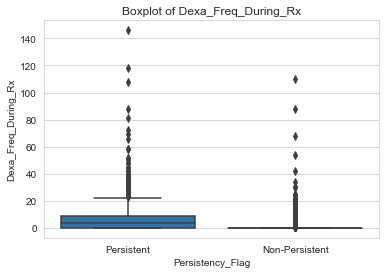

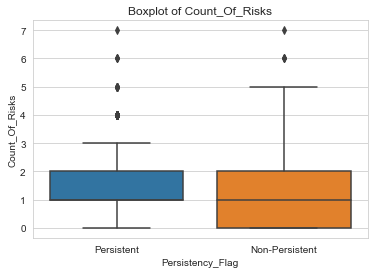

In [10]:
for col in numerical_features:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) 
        plt.show()

In [11]:
df.drop(['Ptid'], axis=1, inplace=True)

In [12]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'

In [13]:
for col in categorical_features:
    print(df[col].value_counts())
    

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                      

In [14]:
#number of categories in the categorical features
#for feature in categorical_features:
   # print('The feature is {} and number of categories are {}'.format(feature,(df[feature].unique())))

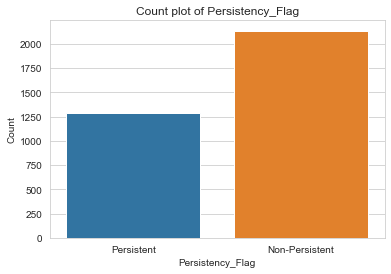

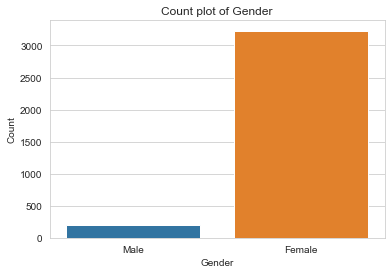

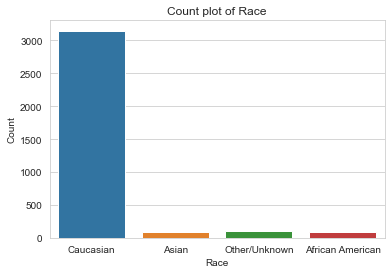

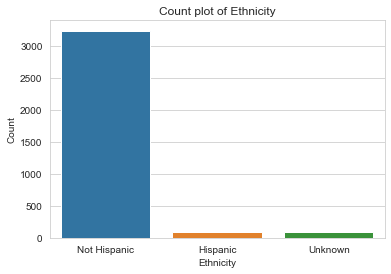

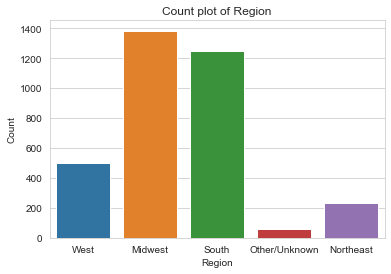

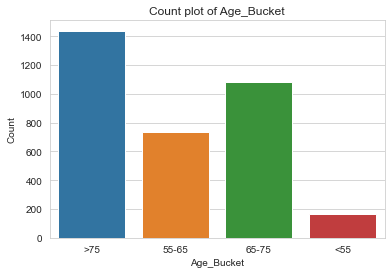

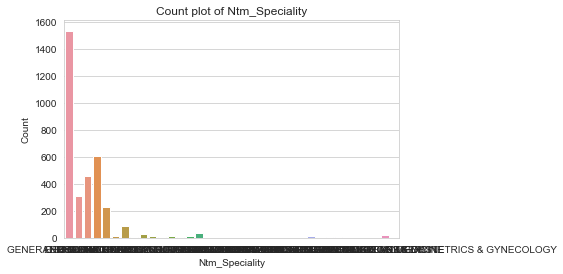

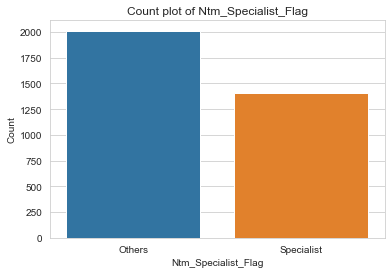

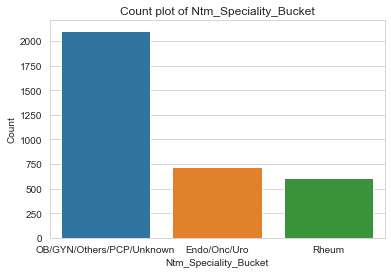

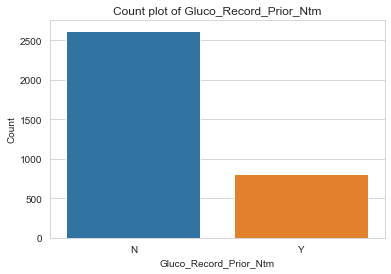

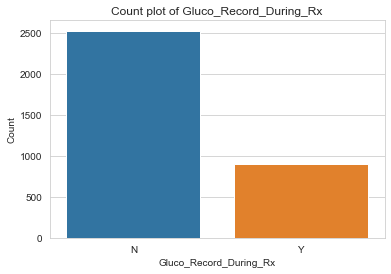

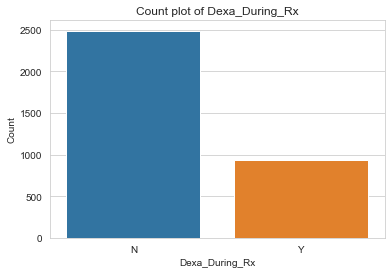

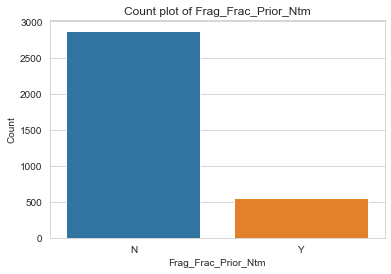

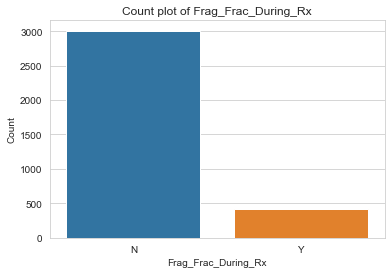

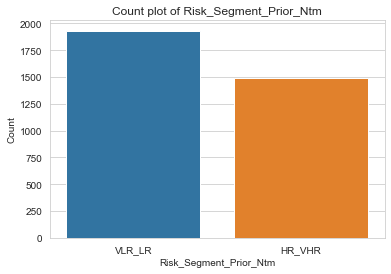

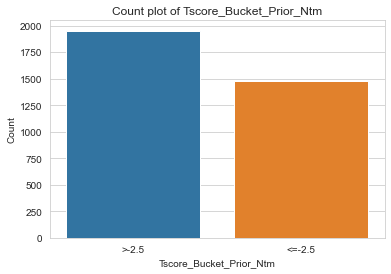

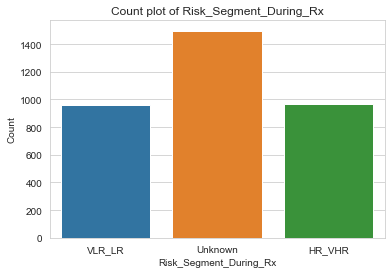

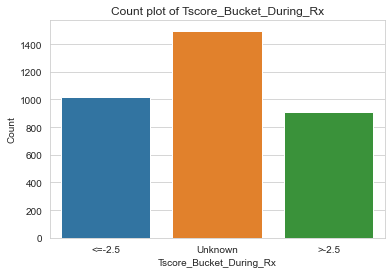

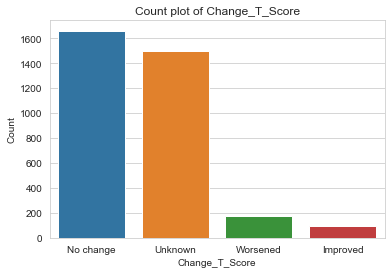

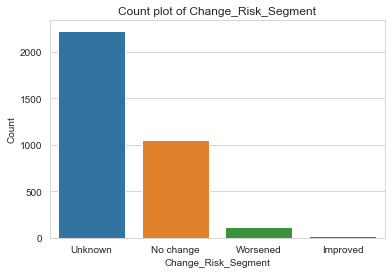

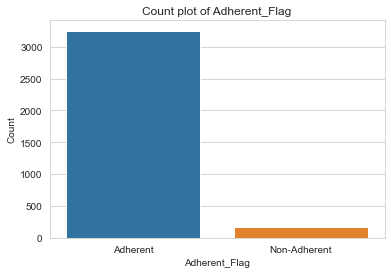

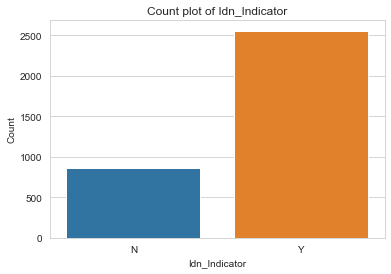

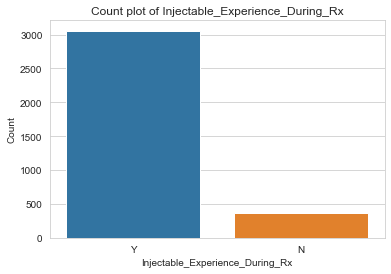

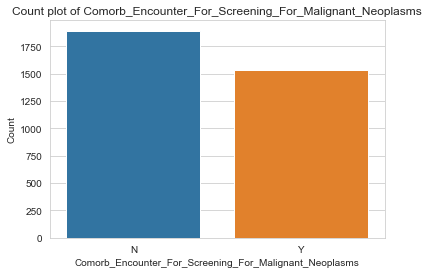

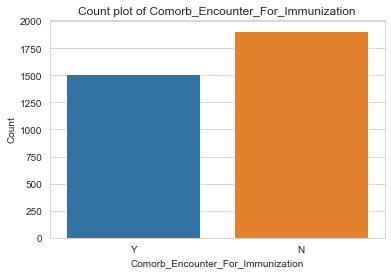

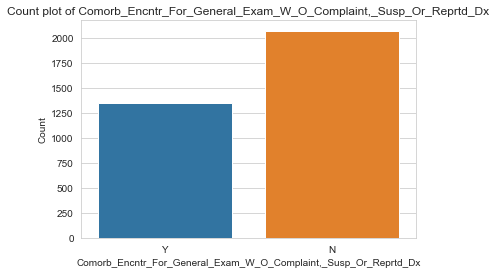

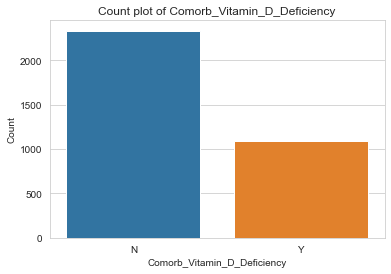

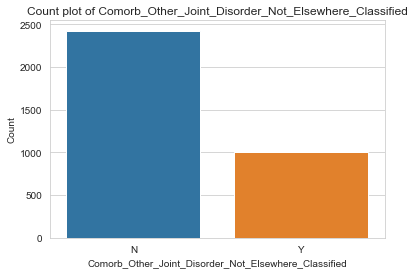

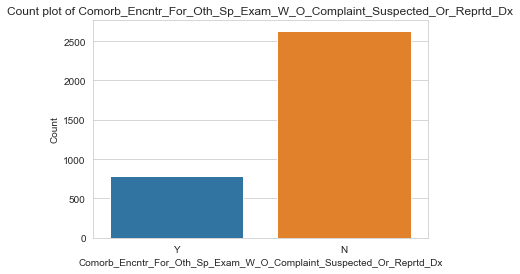

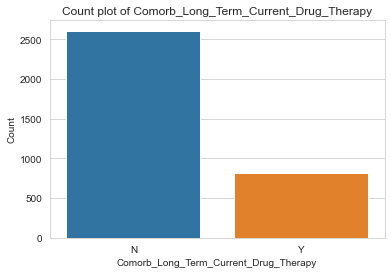

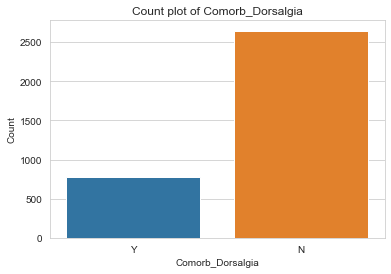

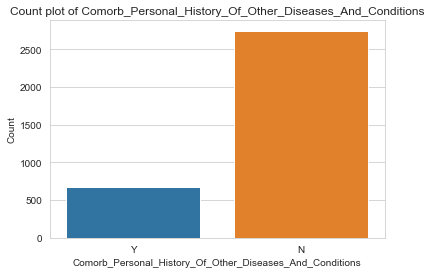

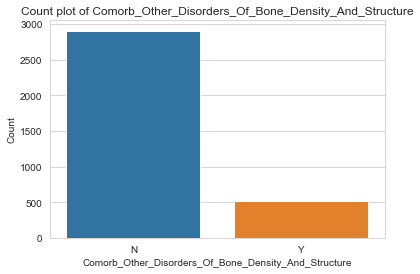

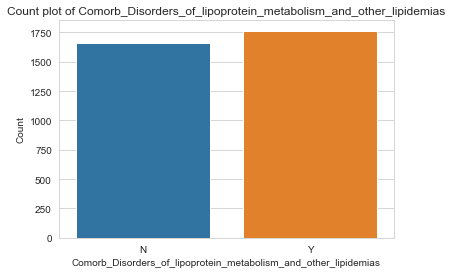

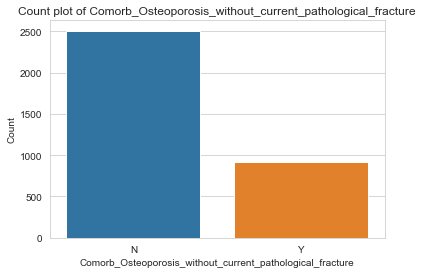

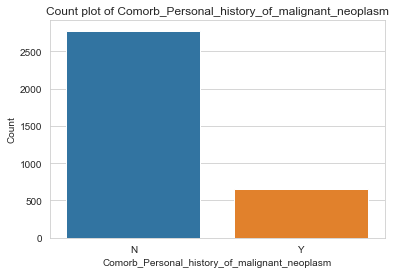

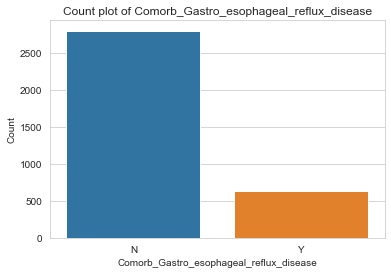

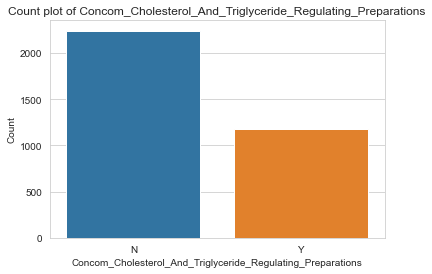

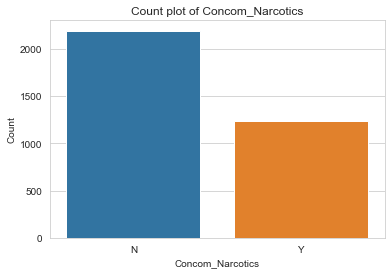

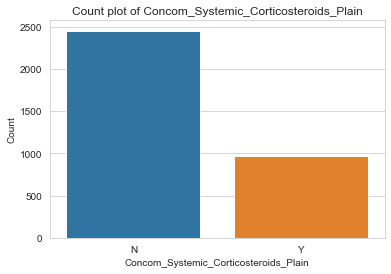

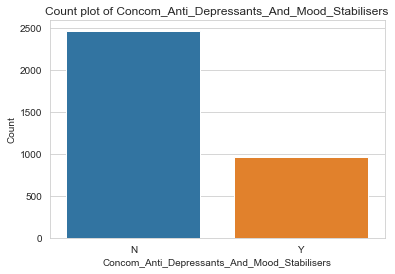

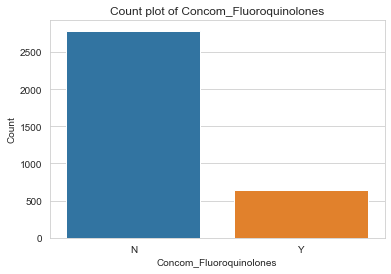

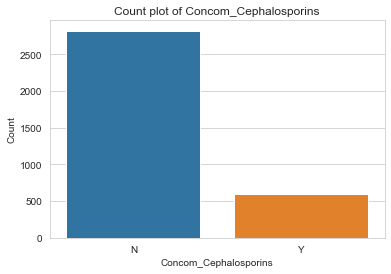

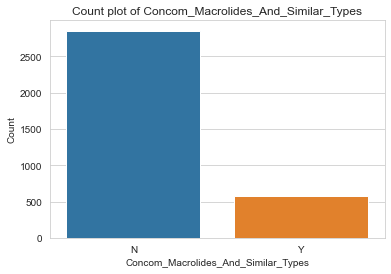

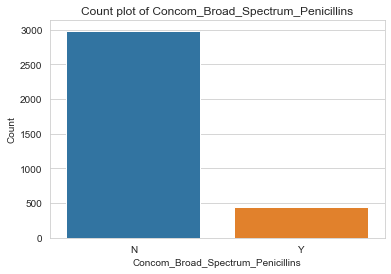

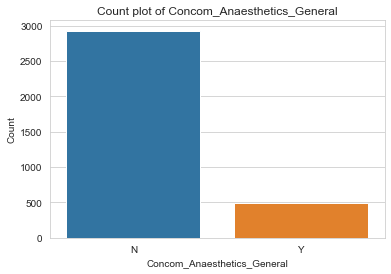

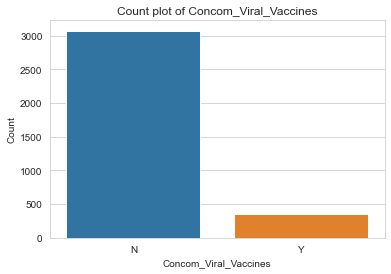

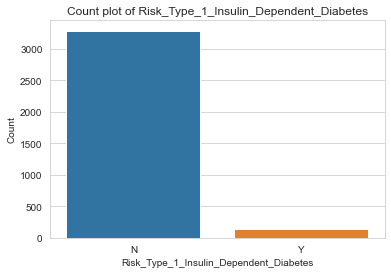

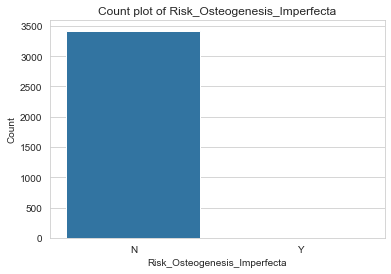

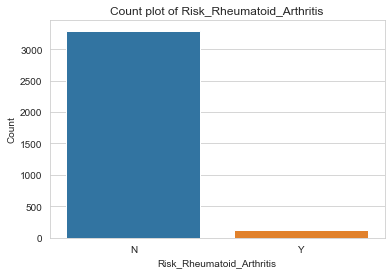

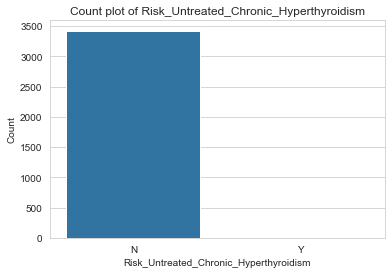

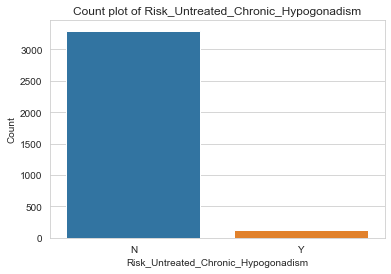

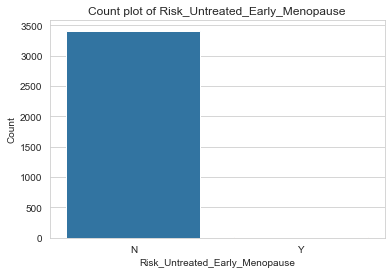

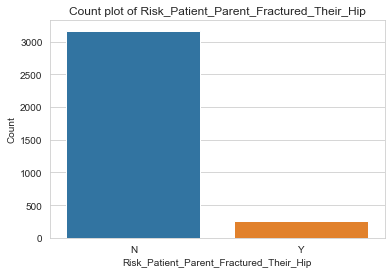

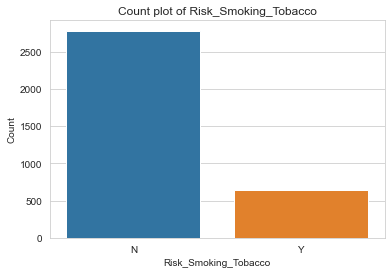

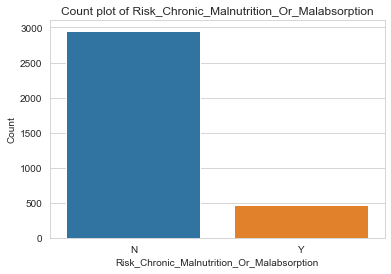

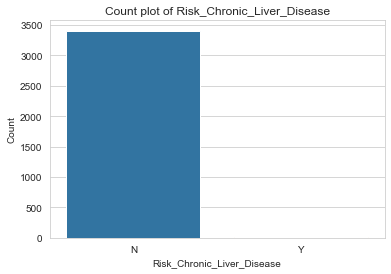

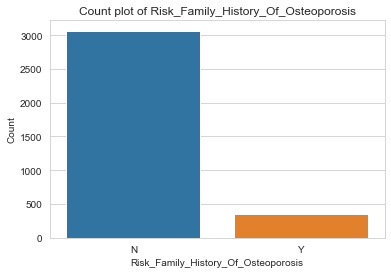

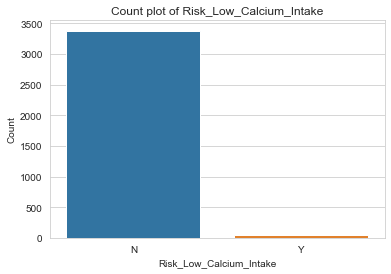

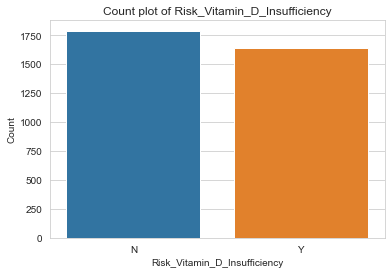

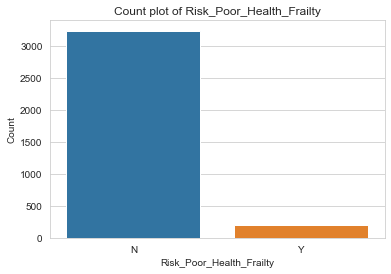

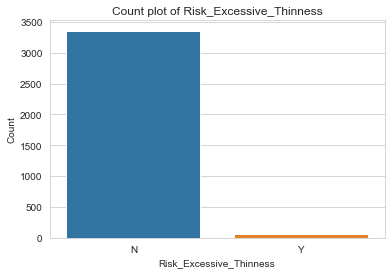

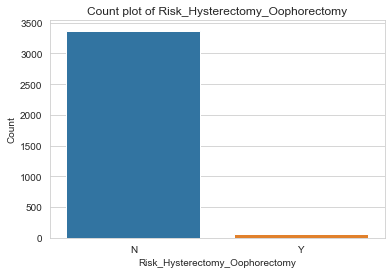

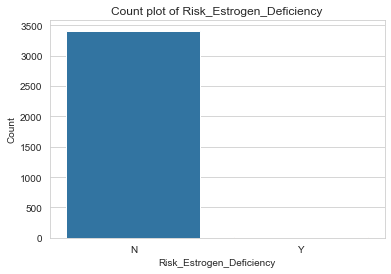

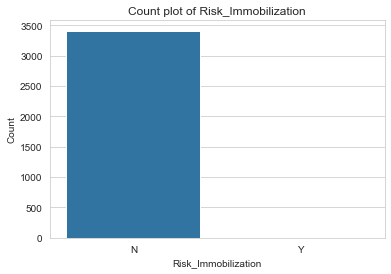

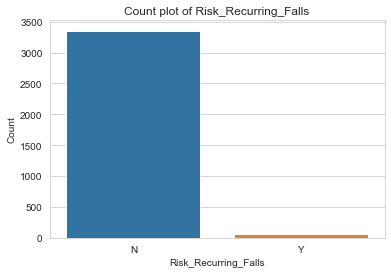

In [15]:
for col in categorical_features:
        sns.set_style('whitegrid')
        sns.countplot(x=col, data=df)
        plt.title('Count plot of ' + col)
        plt.ylabel('Count') 
        plt.show()

# Outlier detection and treatment

Boolean Method

In [16]:
#for Count_Of_Risks, find IQR
Q1 = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR=Q3-Q1
IQR

3.0

In [17]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Dexa_Freq_During_Rx'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool

In [18]:

mask_high.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool>

In [19]:
#This will return the sum of the high outliers in column.
df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-19-84ef8848a6f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)


In [20]:
#find and change the values of the high outliers,this is call capping 
df.Dexa_Freq_During_Rx[mask_high]

32      7.5
33      7.5
62      7.5
65      7.5
89      7.5
       ... 
3384    7.5
3396    7.5
3400    7.5
3411    7.5
3414    7.5
Name: Dexa_Freq_During_Rx, Length: 460, dtype: float64

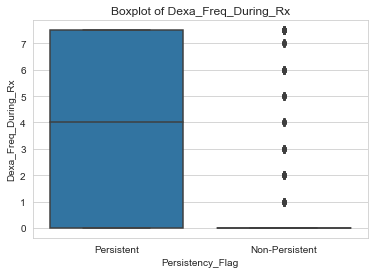

In [21]:
#Boxplot to check the outliers
sns.set_style('whitegrid')
sns.boxplot(x='Persistency_Flag', y='Dexa_Freq_During_Rx', data=df)
plt.title('Boxplot of Dexa_Freq_During_Rx')
plt.ylabel('Dexa_Freq_During_Rx') 
plt.show()

In [22]:
#for Count_Of_Risks, find IQR
Q1 = df['Count_Of_Risks'].quantile(0.25)
Q3 = df['Count_Of_Risks'].quantile(0.75)
IQR=Q3-Q1
IQR

2.0

In [23]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Count_Of_Risks'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool

In [24]:

mask_high.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool>

In [25]:
#This will return the sum of the high outliers in column.
df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-25-368489247ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)


In [26]:
##find and change the values of the high outliers,this is call capping 
df.Count_Of_Risks[mask_high]

342     5
817     5
1059    5
2601    5
2860    5
3045    5
3146    5
3340    5
Name: Count_Of_Risks, dtype: int64

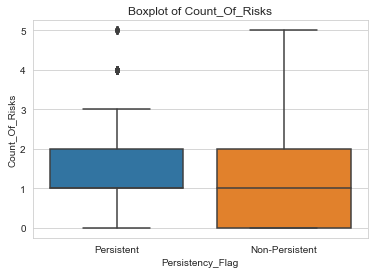

In [27]:
#Box plot to check for outliers
sns.set_style('whitegrid')
sns.boxplot(x='Persistency_Flag', y='Count_Of_Risks', data=df)
plt.title('Boxplot of Count_Of_Risks')
plt.ylabel('Count_Of_Risks') 
plt.show()

In [28]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,1.692465,1.236565
std,2.908085,1.082944
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,7.500000,5.000000


# Treatment of skewed data

Skew details

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>,
        <AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

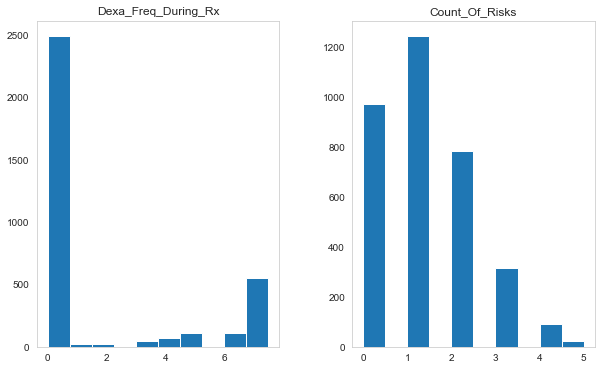

In [29]:
#Histogram of the numerical data to check skew
df.hist(grid=False,
       figsize=(10, 6),
       bins=10)

In [30]:
#skew and kurtosis values
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,1.254572,-0.260917
Count_Of_Risks,0.778326,0.300433


Log transformation

In [31]:
df[['log_Dexa','log_Count_Risks']] = np.log1p(df[['Dexa_Freq_During_Rx','Count_Of_Risks']])

In [32]:
df[['log_Dexa','log_Count_Risks']]

,log_Dexa,log_Count_Risks
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,1.098612
3,0.000000,0.693147
4,0.000000,0.693147
...,...,...
3419,0.000000,0.693147
3420,0.000000,0.000000
3421,2.079442,0.693147
3422,0.000000,0.000000


In [33]:
#Checking skew after transformation
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,1.254572,-0.260917
Count_Of_Risks,0.778326,0.300433
log_Dexa,1.112524,-0.682697
log_Count_Risks,-0.105101,-1.040470


EDA

In [34]:
df.Persistency_Flag.value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [35]:
df.Persistency_Flag = (df.Persistency_Flag == 'Persistent').astype(int)

In [36]:
df.Persistency_Flag.head()

0    1
1    0
2    0
3    0
4    0
Name: Persistency_Flag, dtype: int32

In [37]:
global_mean = df.Persistency_Flag.mean()
round(global_mean, 3)

0.376

In [38]:
for col in categorical_features:
    df_group = df.groupby(by=col).Persistency_Flag.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
Persistency_Flag,,,
0,0,-0.37646,0.000000
1,1,0.62354,2.656323


,mean,diff,risk
Gender,,,
Female,0.375232,-0.001228,0.996738
Male,0.396907,0.020447,1.054314


,mean,diff,risk
Race,,,
African American,0.315789,-0.060671,0.838839
Asian,0.488095,0.111635,1.296538
Caucasian,0.376429,-0.000031,0.999918
Other/Unknown,0.340206,-0.036254,0.903697


,mean,diff,risk
Ethnicity,,,
Hispanic,0.326531,-0.049930,0.867371
Not Hispanic,0.379289,0.002829,1.007514
Unknown,0.329670,-0.046790,0.875711


,mean,diff,risk
Region,,,
Midwest,0.324657,-0.051804,0.862393
Northeast,0.422414,0.045954,1.122067
Other/Unknown,0.416667,0.040206,1.106801
South,0.396151,0.019690,1.052304
West,0.444223,0.067763,1.180000


,mean,diff,risk
Age_Bucket,,,
55-65,0.356071,-0.020389,0.945839
65-75,0.398711,0.022251,1.059105
<55,0.379518,0.003058,1.008122
>75,0.369701,-0.006759,0.982046


,mean,diff,risk
Ntm_Speciality,,,
CARDIOLOGY,0.000000,-0.376460,0.000000
CLINICAL NURSE SPECIALIST,0.000000,-0.376460,0.000000
EMERGENCY MEDICINE,0.000000,-0.376460,0.000000
ENDOCRINOLOGY,0.495633,0.119173,1.316562
GASTROENTEROLOGY,0.000000,-0.376460,0.000000
GENERAL PRACTITIONER,0.321824,-0.054636,0.854869
GERIATRIC MEDICINE,0.000000,-0.376460,0.000000
HEMATOLOGY & ONCOLOGY,0.428571,0.052111,1.138424
HOSPICE AND PALLIATIVE MEDICINE,0.500000,0.123540,1.328161


,mean,diff,risk
Ntm_Specialist_Flag,,,
Others,0.319921,-0.056540,0.849812
Specialist,0.457123,0.080662,1.214265


,mean,diff,risk
Ntm_Speciality_Bucket,,,
Endo/Onc/Uro,0.539106,0.162646,1.432040
OB/GYN/Others/PCP/Unknown,0.320817,-0.055643,0.852195
Rheum,0.377483,0.001023,1.002718


,mean,diff,risk
Gluco_Record_Prior_Ntm,,,
N,0.378007,0.001547,1.004108
Y,0.371429,-0.005032,0.986634


,mean,diff,risk
Gluco_Record_During_Rx,,,
N,0.31483,-0.061631,0.836289
Y,0.54878,0.172320,1.457738


,mean,diff,risk
Dexa_During_Rx,,,
N,0.230305,-0.146155,0.611766
Y,0.764957,0.388497,2.031973


,mean,diff,risk
Frag_Frac_Prior_Ntm,,,
N,0.376393,-0.000068,0.999821
Y,0.376812,0.000351,1.000933


,mean,diff,risk
Frag_Frac_During_Rx,,,
N,0.357167,-0.019294,0.948750
Y,0.515588,0.139127,1.369567


,mean,diff,risk
Risk_Segment_Prior_Ntm,,,
HR_VHR,0.369725,-0.006735,0.982110
VLR_LR,0.381668,0.005207,1.013832


,mean,diff,risk
Tscore_Bucket_Prior_Ntm,,,
<=-2.5,0.365920,-0.010540,0.972001
>-2.5,0.384418,0.007958,1.021139


,mean,diff,risk
Risk_Segment_During_Rx,,,
HR_VHR,0.453886,0.077426,1.205668
Unknown,0.277221,-0.099239,0.736389
VLR_LR,0.453222,0.076762,1.203905


,mean,diff,risk
Tscore_Bucket_During_Rx,,,
<=-2.5,0.439528,0.063068,1.167528
>-2.5,0.469231,0.092770,1.246428
Unknown,0.277221,-0.099239,0.736389


,mean,diff,risk
Change_T_Score,,,
Improved,0.702128,0.325667,1.865078
No change,0.422289,0.045829,1.121736
Unknown,0.277221,-0.099239,0.736389
Worsened,0.618497,0.242037,1.642928


,mean,diff,risk
Change_Risk_Segment,,,
Improved,0.590909,0.214449,1.569645
No change,0.409696,0.033236,1.088284
Unknown,0.346344,-0.030117,0.920001
Worsened,0.603306,0.226846,1.602575


,mean,diff,risk
Adherent_Flag,,,
Adherent,0.363888,-0.012572,0.966604
Non-Adherent,0.612717,0.236256,1.627573


,mean,diff,risk
Idn_Indicator,,,
N,0.283737,-0.092723,0.753697
Y,0.407900,0.031440,1.083514


,mean,diff,risk
Injectable_Experience_During_Rx,,,
N,0.239130,-0.137330,0.635208
Y,0.392997,0.016537,1.043928


,mean,diff,risk
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,,,
N,0.235854,-0.140606,0.626504
Y,0.549902,0.173442,1.460718


,mean,diff,risk
Comorb_Encounter_For_Immunization,,,
N,0.240712,-0.135749,0.639408
Y,0.547918,0.171458,1.455447


,mean,diff,risk
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",,,
N,0.263031,-0.113429,0.698695
Y,0.550296,0.173836,1.461763


,mean,diff,risk
Comorb_Vitamin_D_Deficiency,,,
N,0.319176,-0.057284,0.847835
Y,0.498628,0.122167,1.324516


,mean,diff,risk
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,,,
N,0.303918,-0.072543,0.807303
Y,0.552553,0.176092,1.467758


,mean,diff,risk
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,,,
N,0.319787,-0.056673,0.849458
Y,0.565107,0.188647,1.501108


,mean,diff,risk
Comorb_Long_Term_Current_Drug_Therapy,,,
N,0.280783,-0.095678,0.745849
Y,0.681763,0.305302,1.810981


,mean,diff,risk
Comorb_Dorsalgia,,,
N,0.319849,-0.056612,0.849622
Y,0.568678,0.192218,1.510592


,mean,diff,risk
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,,,
N,0.323626,-0.052835,0.859654
Y,0.590842,0.214382,1.569467


,mean,diff,risk
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,,,
N,0.325877,-0.050583,0.865636
Y,0.660232,0.283771,1.753788


,mean,diff,risk
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,,,
N,0.294756,-0.081704,0.782967
Y,0.453258,0.076798,1.203999


,mean,diff,risk
Comorb_Osteoporosis_without_current_pathological_fracture,,,
N,0.335461,-0.041000,0.891092
Y,0.488550,0.112089,1.297745


,mean,diff,risk
Comorb_Personal_history_of_malignant_neoplasm,,,
N,0.335495,-0.040965,0.891184
Y,0.551618,0.175158,1.465275


,mean,diff,risk
Comorb_Gastro_esophageal_reflux_disease,,,
N,0.325698,-0.050762,0.865159
Y,0.601587,0.225127,1.598010


,mean,diff,risk
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,,,
N,0.332293,-0.044168,0.882676
Y,0.460237,0.083777,1.222538


,mean,diff,risk
Concom_Narcotics,,,
N,0.306709,-0.069751,0.814719
Y,0.500406,0.123945,1.329239


,mean,diff,risk
Concom_Systemic_Corticosteroids_Plain,,,
N,0.302326,-0.074135,0.803074
Y,0.563207,0.186746,1.496058


,mean,diff,risk
Concom_Anti_Depressants_And_Mood_Stabilisers,,,
N,0.343205,-0.033255,0.911663
Y,0.461940,0.085479,1.227060


,mean,diff,risk
Concom_Fluoroquinolones,,,
N,0.333333,-0.043127,0.885441
Y,0.565149,0.188689,1.501218


,mean,diff,risk
Concom_Cephalosporins,,,
N,0.326834,-0.049626,0.868178
Y,0.608624,0.232163,1.616701


,mean,diff,risk
Concom_Macrolides_And_Similar_Types,,,
N,0.328426,-0.048034,0.872406
Y,0.616462,0.240002,1.637523


,mean,diff,risk
Concom_Broad_Spectrum_Penicillins,,,
N,0.339698,-0.036762,0.902349
Y,0.626424,0.249963,1.663983


,mean,diff,risk
Concom_Anaesthetics_General,,,
N,0.332081,-0.044380,0.882113
Y,0.637827,0.261367,1.694274


,mean,diff,risk
Concom_Viral_Vaccines,,,
N,0.339954,-0.036506,0.903029
Y,0.694051,0.317591,1.843623


,mean,diff,risk
Risk_Type_1_Insulin_Dependent_Diabetes,,,
N,0.378387,0.001926,1.005117
Y,0.330935,-0.045525,0.879071


,mean,diff,risk
Risk_Osteogenesis_Imperfecta,,,
N,0.376498,0.000038,1.000100
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Rheumatoid_Arthritis,,,
N,0.371281,-0.005179,0.986242
Y,0.507692,0.131232,1.348595


,mean,diff,risk
Risk_Untreated_Chronic_Hyperthyroidism,,,
N,0.37668,0.00022,1.000584
Y,0.00000,-0.37646,0.000000


,mean,diff,risk
Risk_Untreated_Chronic_Hypogonadism,,,
N,0.370033,-0.006427,0.982928
Y,0.543307,0.166847,1.443199


,mean,diff,risk
Risk_Untreated_Early_Menopause,,,
N,0.376612,0.000152,1.000403
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Patient_Parent_Fractured_Their_Hip,,,
N,0.375316,-0.001145,0.996960
Y,0.390625,0.014165,1.037626


,mean,diff,risk
Risk_Smoking_Tobacco,,,
N,0.353597,-0.022863,0.939268
Y,0.475155,0.098695,1.262166


,mean,diff,risk
Risk_Chronic_Malnutrition_Or_Malabsorption,,,
N,0.36696,-0.00950,0.974764
Y,0.43617,0.05971,1.158609


,mean,diff,risk
Risk_Chronic_Liver_Disease,,,
N,0.375807,-0.000653,0.998266
Y,0.500000,0.123540,1.328161


,mean,diff,risk
Risk_Family_History_Of_Osteoporosis,,,
N,0.377038,0.000578,1.001536
Y,0.371508,-0.004952,0.986846


,mean,diff,risk
Risk_Low_Calcium_Intake,,,
N,0.376996,0.000536,1.001423
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Vitamin_D_Insufficiency,,,
N,0.339485,-0.036975,0.901783
Y,0.416870,0.040410,1.107342


,mean,diff,risk
Risk_Poor_Health_Frailty,,,
N,0.381807,0.005347,1.014202
Y,0.286458,-0.090002,0.760926


,mean,diff,risk
Risk_Excessive_Thinness,,,
N,0.379208,0.002747,1.007298
Y,0.238806,-0.137654,0.634346


,mean,diff,risk
Risk_Hysterectomy_Oophorectomy,,,
N,0.377448,0.000988,1.002624
Y,0.314815,-0.061645,0.836250


,mean,diff,risk
Risk_Estrogen_Deficiency,,,
N,0.376795,0.000334,1.000888
Y,0.272727,-0.103733,0.724452


,mean,diff,risk
Risk_Immobilization,,,
N,0.378006,0.001546,1.004106
Y,0.000000,-0.376460,0.000000


,mean,diff,risk
Risk_Recurring_Falls,,,
N,0.377943,0.001483,1.003940
Y,0.304348,-0.072112,0.808446


In [39]:
from sklearn.metrics import mutual_info_score

In [40]:
def calculate_mi(series):
    return mutual_info_score(series, df.Persistency_Flag)

df_mi = df[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


In [41]:
df_mi

,MI
Persistency_Flag,6.623046e-01
Dexa_During_Rx,1.211142e-01
Comorb_Long_Term_Current_Drug_Therapy,6.101576e-02
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,5.251710e-02
Comorb_Encounter_For_Immunization,5.002321e-02
...,...
Gluco_Record_Prior_Ntm,1.659650e-05
Risk_Untreated_Early_Menopause,1.416782e-05
Risk_Family_History_Of_Osteoporosis,6.108238e-06
Risk_Osteogenesis_Imperfecta,3.532791e-06


In [42]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,log_Dexa,log_Count_Risks
0,1,0.0,0,0.0,0.000000
1,0,0.0,0,0.0,0.000000
2,0,0.0,2,0.0,1.098612
3,0,0.0,1,0.0,0.693147
4,0,0.0,1,0.0,0.693147


In [43]:
corr_Matrix=df.corr()
corr_Matrix

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,log_Dexa,log_Count_Risks
Persistency_Flag,1.000000,0.517337,0.082431,0.517315,0.083250
Dexa_Freq_During_Rx,0.517337,1.000000,0.063414,0.990813,0.064419
Count_Of_Risks,0.082431,0.063414,1.000000,0.067388,0.966552
log_Dexa,0.517315,0.990813,0.067388,1.000000,0.067405
log_Count_Risks,0.083250,0.064419,0.966552,0.067405,1.000000


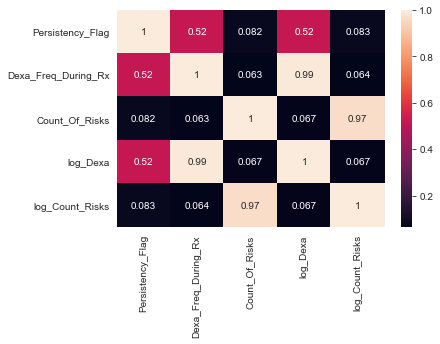

In [44]:
sns.heatmap(corr_Matrix,annot=True)
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif_data = pd.DataFrame()
X=df[numerical_features]
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature        VIF
0     Persistency_Flag   2.073339
1  Dexa_Freq_During_Rx  73.133799
2       Count_Of_Risks  30.208835
3             log_Dexa  74.262800
4      log_Count_Risks  31.643320


Model Building

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [50]:
len(df_train), len(df_val), len(df_test)

(2054, 685, 685)

In [51]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
y_train = df_train.Persistency_Flag.values
y_val = df_val.Persistency_Flag.values
y_test = df_test.Persistency_Flag.values

del df_train['Persistency_Flag']
del df_val['Persistency_Flag']
del df_test['Persistency_Flag']

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown = 'ignore')
X_train=ohe.fit_transform(df_train)
#X_train
X_val=ohe.transform(df_val)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [58]:
model.intercept_[0]

0.06763208956436635

In [59]:
model.coef_[0].round(3)

array([-2.380e-01,  3.050e-01, -1.510e-01,  5.190e-01, -1.300e-01,
       -1.710e-01, -2.000e-02,  1.500e-01, -6.200e-02, -1.880e-01,
        4.130e-01, -3.450e-01,  3.090e-01, -1.210e-01, -7.000e-03,
       -9.000e-02,  9.100e-02,  7.300e-02, -1.487e+00, -7.300e-02,
       -6.000e-02, -1.600e-01, -1.290e-01, -1.220e-01, -5.120e-01,
       -1.000e-03,  7.100e-02,  4.190e-01,  2.800e-01,  8.900e-02,
       -3.800e-02,  3.000e-03,  7.790e-01,  1.780e-01, -2.680e-01,
       -2.820e-01, -2.000e-02,  1.108e+00,  8.980e-01, -6.060e-01,
        3.670e-01, -1.170e-01,  4.230e-01, -2.910e-01,  5.530e-01,
       -1.570e-01, -5.330e-01, -3.530e-01,  2.700e-02,  8.300e-02,
       -5.000e-03,  7.300e-02,  2.650e-01, -4.000e-02, -1.570e-01,
        3.930e-01, -3.250e-01, -7.300e-02,  1.410e-01, -2.890e-01,
       -1.144e+00, -1.216e+00, -9.500e-02,  4.470e-01,  8.680e-01,
        3.800e-01,  6.060e-01,  5.130e-01, -2.890e-01,  3.570e-01,
        1.170e-01, -5.000e-02, -3.100e-02,  9.800e-02,  7.900e

In [60]:
y_pred = model.predict_proba(X_val)[:,1]

In [72]:
persistency = y_pred > 0.5

In [73]:
(y_val == persistency).mean()

0.8058394160583942

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.371
0.05 0.508
0.10 0.616
0.15 0.686
0.20 0.733
0.25 0.762
0.30 0.785
0.35 0.793
0.40 0.796
0.45 0.806
0.50 0.806
0.55 0.800
0.60 0.803
0.65 0.801
0.70 0.790
0.75 0.781
0.80 0.766
0.85 0.758
0.90 0.739
0.95 0.720
1.00 0.629


In [65]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [66]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

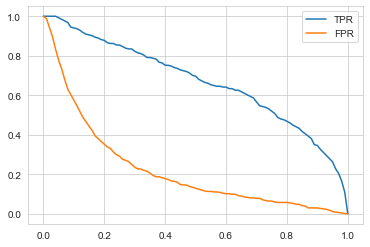

In [67]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
roc_auc_score(y_val, y_pred)

0.8654931764619909

In [80]:
from lightgbm import LGBMClassifier

In [81]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [83]:
y_pred = model.predict_proba(X_val)[:,1]

In [84]:
persistency = y_pred > 0.5

In [85]:
(y_val == persistency).mean()

0.7897810218978102

In [86]:
roc_auc_score(y_val, y_pred)

0.8537734987302921

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [89]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [94]:
y_pred = clf_gini.predict(X_val)

In [96]:
persistency = y_pred > 0.5

In [97]:
(y_val == persistency).mean()

0.781021897810219

In [98]:
roc_auc_score(y_val, y_pred)

0.7402944991504832